### В игре происходят бои. На бой игрок выставляет 4-х бойцов, каждый боец вооружен некоторым оружием. После того как завершается бой, происходит запись информации об этом бое. Записываются уникальный id боя, для каждого бойца тип оружия (4 столбца), длительность боя (в секундах). Последний столбец в датасете - отметка о том, когда был совершен бой, до изменений в балансе или после. В некоторый момент были изменены настройки баланса оружия. Нужно понять, повлияло ли изменение настроек на длительность боя.

### Для ответа на этот вопрос необходимо провести корреляционный анализ.

In [21]:
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv('data_test.csv', encoding='cp1251')
data

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
0,103921,топор,лук,булава,лук,17.35,before
1,117214,посох,посох,лук,лук,21.84,before
2,115502,меч,посох,булава,топор,16.00,before
3,110102,булава,лук,лук,булава,17.22,before
4,104989,меч,посох,булава,посох,19.20,before
...,...,...,...,...,...,...,...
19995,108834,посох,булава,лук,посох,26.37,after
19996,119941,посох,меч,лук,посох,23.73,after
19997,112911,топор,посох,булава,топор,27.73,after
19998,111684,меч,топор,посох,меч,24.20,after


### Для корреляционного анализа сравним вектор значений времени боя и вектор балансировки. Декодируем категориальные данные балансировки в числовые.

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
balance_mark = le.fit_transform(data['balance_mark'])
pd.Series(balance_mark).value_counts()

0    10000
1    10000
dtype: int64

In [24]:
data['balance_mark'] = balance_mark
data

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
0,103921,топор,лук,булава,лук,17.35,1
1,117214,посох,посох,лук,лук,21.84,1
2,115502,меч,посох,булава,топор,16.00,1
3,110102,булава,лук,лук,булава,17.22,1
4,104989,меч,посох,булава,посох,19.20,1
...,...,...,...,...,...,...,...
19995,108834,посох,булава,лук,посох,26.37,0
19996,119941,посох,меч,лук,посох,23.73,0
19997,112911,топор,посох,булава,топор,27.73,0
19998,111684,меч,топор,посох,меч,24.20,0


### Построим матрицу корреляции

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
corr_digit = data[['len', 'balance_mark']].corr()
corr_digit

,len,balance_mark
len,1.000000,-0.524375
balance_mark,-0.524375,1.000000


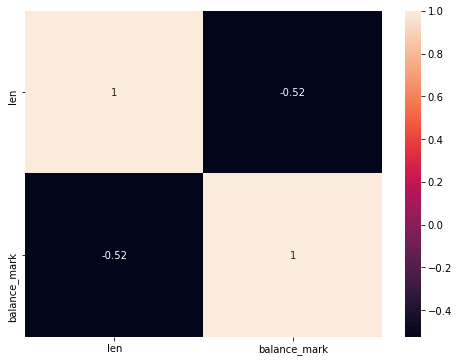

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_digit, annot=True)
plt.show()

### Вывод. Легко увидеть, что коэффициент корреляции составляет -0,52, что соответвует таблице Чеддока как заметная зависимость. Значит изменение настроек повлияло на длительность боя. Знак минус говорит об обратной зависимости.